# Fundamentals of Data Analysis Tasks

Phelim Barry

***

# Introduction

The purpose of this...

# Table of Contents

1. [Task1](#Task1)
2. [Task2](#Task2)
3. [Task3](#Task3)
4. [Task4](#Task4)
5. [Task5](#Task5)
6. [References](#References)



# Task1

>The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer $x$ and repeatedly apply the function $f(x)$ below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .   
This task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

If $x$ is even, $f(x) = x ÷ 2$   
If $x$ is odd, $f(x) = 3x + 1$

Define a function for $f(x)$ and apply the appropriate formula. Using the modulus operator we can determine if $x$ is even (i.e. no remainder when divided by 2) or else $x$ must be odd.

In [3]:
def f(x):
    if x % 2 == 0:          #x is even
        return x // 2
    else:                   #x is odd
        return (3 * x) + 1

Define a function to check the $x$ value. If after applying the formula to the number, we arrive at a value equal to 1 then we have proved for that number and move on to the next number. If we reach the number 10001 then we have proved for all numbers between 1 and 10000

In [4]:
def collatz(x):
    while x != 1:
        x = f(x)            #call the f(x) function

Run the function and print a confirmation message once complete.

In [5]:
# Define start and end range values
start_range = 1
stop_range = 10001

for num in range (start_range, stop_range):
    collatz(num)        #call the collatz function

print (f'We have cycled through the values from {start_range} to {stop_range-1} and each time ended with a value of 1 \nindicating the conjecture is true for the first {stop_range-1} positive integers')


We have cycled through the values from 1 to 10000 and each time ended with a value of 1 
indicating the conjecture is true for the first 10000 positive integers


# Task2


>The purpose of this task is to give an overview of the penguins data set explaining the types of variables it contains.

>We will also suggest the types of variables that should be used to model them in Python giving explanations for the rationale.

**Overview**

The Palmer Penguin Dataset contains measurements of three different species of penguins from three islands in the Palmer Archipelago in Antartica. The data were collected between 2007 and 2009 and made available by researcher Dr. Kristen Gorman and other researchers from the Palmer Research Station.

Similar to the Iris dataset it is often used to explore areas of data analysis such as correlation and regression.
 

The dataset is available to view in a number of locations where we could quickly look and see the column names such as from Michael Waskom's $^1$ repository on GitHub. From there we can see that the dataset has seven columns of data containing the following variables:

| Variable Name |
| --- |
| species |
| island |
| bill_length_mm |
| bill_depth_mm |
| flipper_length_mm |
| body_mass_g |
| sex |
 

The dataset is also availble directly through seaborn so by importing it we can do some analysis on the data to better understand the amount of data and the different columns.

In [6]:
# Import seaborn and load the penguins data set into a new dataframe df

import seaborn as sns
import numpy as np

df=sns.load_dataset ('penguins')


In [7]:
# print the dataframe to view the data

df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


From this we can see that species, island and sex contain categorical data while the remaining seem to contain numerical data.

We can then use the ```unique``` command to list the full set of values in each column containing categorical variables...

In [8]:
#x = df.species.unique()
print(f'The values in species column are {df.species.unique()}')
print(f'The values in island column are {df.island.unique()}')
print(f'The values in sex column are {df.sex.unique()}')


The values in species column are ['Adelie' 'Chinstrap' 'Gentoo']
The values in island column are ['Torgersen' 'Biscoe' 'Dream']
The values in sex column are ['Male' 'Female' nan]


Categorical variable types are used when the variable can only be one of a specific list of values or used to describe qualitative data. In the penguins dataset the three categorical variables have very specific values.   
Species has three values: Adelie, Chinstrap and Gentoo. Island also has three values: Biscoe, Dream and Torgersen. Sex has two values: male and female.   
All three of these variables can be described as nominal as they are being used to name something.   



Numeric variable types are also known as quantitative variables because they typically are used to measure something using a number value. The penguins dataset contains four numeric variables with three measured in millimeters and one measured in grams. These are continuous variables and can be further broken down and described as ratio variables because they cantain numbers that have measurable differences that can be determined such as the differences in lengths, weights etc. Given that all four of the variables are being used to measure something they would be considered to be using real numbers. The presence of decimal places also points to them being real numbers.

Based on the analysis above we can determine that the dataset contains the following variables and data types.

| Variable Name | Type | Description |
| --- | --- | --- |
| species | categorical | penguin species - Adelie, Chinstrap or Gentoo |
| island | categorical | island name - Biscoe, Dream or Torgersen |
| bill_length_mm | numeric/real | penguin bill length measured in mm |
| bill_depth_mm | numeric/real | penguin bill depth measured in mm |
| flipper_length_mm | numeric/real | penguin flipper length measured in mm |
| body_mass_g | numeric/real | penguin body mass measured in grams |
| sex | categorical | penguin sex - male or female |

**Suggested Variable Types in Python**

To model each of the variables in Python the following data types are suggested...


| Variable Name | Type | Python Variable Type |
| --- | --- | --- |
| species | categorical | string |
| island | categorical | string |
| sex | categorical | string |
| bill_length | numeric/real | float |
| bill_depth | numeric/real | float |
| flipper_length | numeric/real | float |
| body_mass | numeric/real | float |

Categorical variables typically only contain a limited number of possible values and would not be used to perform any mathematical operations. They can contain alpha characters, numerica values or even special characters but usually would not contain numbers only. Such variables are stored as type ```string``` or ```str``` in Python.   

Species, Island and sex can all be modeled as type ```str```. All three variables contain alpha characters and are a small set of fixed values. 

Numeric values in python usually are defined as type ```int``` or ```floating point``` (can also be complex). ```int``` variable types are whole numbers with no decimal places. They are ideal for performing addition or subtraction but if we are to perform any arithmetic involving division such as calculating means or average values, then our calculated value would turn into a ```float``` by default python logic. ```float``` or floating-point variables are used to store values with decimal points. Arithmetic on float values will always result in another float value and will display a value after the decimal point even if the value is $.0$.   

With this in mind it would be best to model bill_length and bill_depth as type ```float``` because both contain decimal values. 
flipper_length and body_mass could be stored as ```int``` variables as they do not contain decimals however if we needed to convert the values to centimeters or kilograms then that would introduce decimal places so it would be best to store them as ```float``` also.

In total, there are 344 rows of data in the dataset. However, unlike the iris dataset, the penguins dataset has some missing values which show up as 'NaN' when the data is imported. These can be found using the ```isnull().sum()``` command as follows:

In [9]:
#df.isnull()
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

When analysing the data these will need to be taken into consideration and dealt with appropriately. For example, 

# Task3

>For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

The dataset contains the following variables:
| Variable Name |
| --- |
| species |
| island |
| bill_length_mm |
| bill_depth_mm |
| flipper_length_mm |
| body_mass_g |
| sex |

### Species ###  
We can see that the species variable...

### Island ###  
We can see that the island variable...

### Sex ###  
We can see that the sex variable only contains two possible values - male or female - meaning the data is discrete, and each sample is independent of each other. We can also see that there seems an almost equal possibility of a penguin being either male or female.

Need to add data here for count of male/female

With these details in mind we could model the data using a binomial distribution.

In [10]:
# model sex variable using binomial distributions
rng = np.random.default_rng()

n, p = 1, .5  # n = number of trials (success=male, failure=female), p = probability of each trial (50/50 or .5)
sex_prob = rng.binomial(n, p, 10000)
#print(sex_prob)

# Print results
male = np.sum(sex_prob == 1)
female = np.sum(sex_prob == 0)
print (f'Number of males = {male}')
print (f'Number of females = {female}')

Number of males = 5009
Number of females = 4991


### Body Mass

Body Mass is a continuous variable...so to view the data we can plot a histogram...

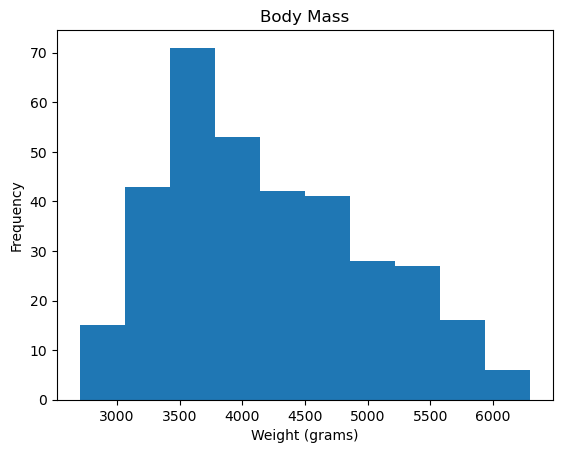

In [11]:
# Histogram code
import matplotlib.pyplot as plt

#Create a list just for Body Mass and generate a histogram
body_mass_l = []
for x in df['body_mass_g']:
    body_mass_l.append(x)

body_mass_l

#Sort the list before creating the histogram
body_mass_l.sort()
#Add title and labels
plt.title("Body Mass")
plt.xlabel("Weight (grams)")
plt.ylabel("Frequency")
plt.hist(body_mass_l)
plt.show()

As we can see the histogram is right skewed...in order to better visualise the data we can plot a new histogram by penguin type...

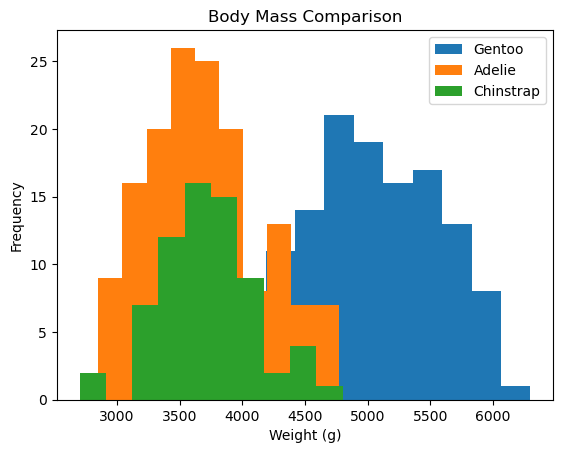

In [41]:
#Split out by species
gentoo_l=df.loc[df["species"]=="Gentoo"]
chinstrap_l=df.loc[df["species"]=="Chinstrap"]
adelie_l=df.loc[df["species"]=="Adelie"]

'''# gentoo_l = df.loc[["Gentoo"], ["species"]]
gentoo_l =[]
#gentoo_l= list(df["species"]==["Gentoo"])

species_l = []
adelie_l =[]
chinstrap_l = []
for penguin in df["species"]:
    species_l.append(penguin)

for x in species_l:
    if x == "Gentoo":
        gentoo_l.append(x)
    else:
        if x == "Adelie":
            adelie_l.append(x)
        else:
            chinstrap_l.append(x)

#Adelie, Chinstrap or Gentoo
#gentoo = species_l == "Gentoo"
adelie_l

#species_l
'''
plt.clf()
#Sort the data
gentoo_l.sort_values("body_mass_g")
chinstrap_l.sort_values("body_mass_g")
adelie_l.sort_values("body_mass_g")
#Add title and labels
plt.title("Body Mass Comparison")
plt.xlabel("Weight (g)")
plt.ylabel("Frequency")
#create the plots
plt.hist(gentoo_l["body_mass_g"],label='Gentoo')
plt.hist(adelie_l["body_mass_g"],label='Adelie')
plt.hist(chinstrap_l["body_mass_g"],label='Chinstrap')
plt.legend()


Continuous variables/dictributions for bill and flipper variables

Check notes from week5 for prog_da   
look at loc and iloc for extracting particular data   
the describe command gives mean/stdev etc   
Both could be used to check the data before deciding the probability distribution to use to model the data

# Task4

>The purpose of this task is to plot the entropy of the total number of heads versus the probability $p$ of giving heads when flipping two coins.

# Task5

>The purpose of this task is to create approprite individual plots for each of the variables in the penguin data set.

The following are the variables in the dataset:

| Variable Name |
| --- |
| species |
| island |
| bill_length_mm |
| bill_depth_mm |
| flipper_length_mm |
| body_mass_g |
| sex |

Describe the data and give reason for the chosen plot type...
discrete v continuous, 
Notes 
Species - Pie/Bar Chart   
Island - Pie/Bar Chart   
Sex - Pie Chart   
flipper/bill size and mass - historgrams   

Scatter Plots for comparing x vs y etc



Sources:
https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn



### species
Species is a categorical variable containing just three possible values...the most appropriate plot to use would be a bar chart showing the frequency of each species...

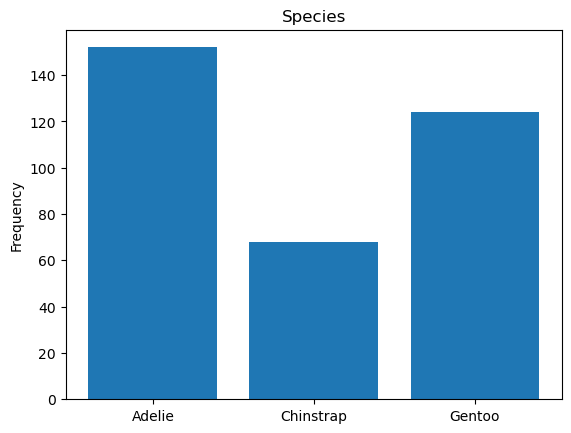

In [13]:
# species

#Create a list just for Species and generate a bar chart

import matplotlib.pyplot as plt

species_l = []
for x in df['species']:
    species_l.append(x)

plt.title("Species")
plt.ylabel("Frequency")
temp=np.unique(species_l)
freq_list = []
for x in temp:
    freq_list.append(species_l.count(x))

plt.bar(temp, freq_list)
plt.show;

# References

$^1$ mwaskom/seaborn-data: Data repository for seaborn examples. Aug. 30, 2023. url: https://github.com/mwaskom/ seaborn - data / blob / master / penguins.csv (visited on 10/25/2023)


***

## End